In [1]:
from IPython.display import Image

# 4장 좋은 훈련 데이터셋 만들기: 데이터 전처리

## 4.1 누락된 데이터 다루기

In [2]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
df.values  # values 속성으로 넘파이 배열을 얻을 수 있습니다

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

---

### 누락된 값이 있는 훈련 샘플이나 특성 제외

In [6]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


---

### 누락된 값 대체

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

In [12]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [13]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

---

In [14]:
from sklearn.preprocessing import FunctionTransformer

ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T, validate=False)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

---

In [15]:
imr = SimpleImputer(add_indicator=True)

imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  8. ,  1. ,  0. ],
       [10. , 11. , 12. ,  6. ,  0. ,  1. ]])

In [16]:
#%%capture
#!pip install -U scikit-learn 
#!conda update scikit-learn

In [17]:
imr.inverse_transform(imputed_data)  # sklearn version 0.24 above

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

---

In [18]:
from sklearn.impute import KNNImputer

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

---

In [19]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [20]:
df.fillna(method='bfill')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [21]:
df.fillna(method='ffill')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,10.0,11.0,12.0,8.0


In [22]:
df.fillna(method='ffill', axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


## 4.2 범주형 테이터 다루기

In [23]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


---

$XL = L + 1 = M + 2$

In [24]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

In [25]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [26]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [27]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

---

In [28]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [29]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [30]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}

In [31]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


---

In [32]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

In [33]:
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [34]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

---

In [35]:
X = df[['color', 'size', 'price']].values

In [36]:
color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

---

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [38]:
ord_enc = OrdinalEncoder(dtype=np.int32)  #
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color', 'classlabel'])])  # 한번에 여러 개 column을 처리할 수 있음

In [39]:
X_trans = col_trans.fit_transform(df)
X_trans

array([[1, 0],
       [2, 1],
       [0, 0]])

In [40]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green', 'class1'],
       ['red', 'class2'],
       ['blue', 'class1']], dtype=object)

---

In [41]:
from sklearn.preprocessing import OneHotEncoder


X = df[['color', 'size', 'price']].values

color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [42]:
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]),
                              ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [43]:
pd.get_dummies(df[['color', 'size', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [44]:
pd.get_dummies(df[['color', 'size', 'price']], columns=['size'])

,color,price,size_1,size_2,size_3
0,green,10.1,1,0,0
1,red,13.5,0,1,0
2,blue,15.3,0,0,1


In [45]:
pd.get_dummies(df[['color', 'size', 'price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


In [46]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), ('nothing', 'passthrough', [1, 2])])

c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

---

In [47]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [48]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class1,0,0
1,red,13.5,class2,1,0
2,blue,15.3,class1,1,1


## 4.3 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누기 

Wine dataset

In [49]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [50]:
print('클래스 레이블', np.unique(df_wine['Class label']))

클래스 레이블 [1 2 3]


In [51]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## 4.4 특성 스케일 맞추기

### 정규화(normalization)

$\displaystyle x_{norm}^{(i)}=\frac{x^{(i)} - x_{min}}{x_{max} -x_{min}}$

In [53]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [54]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 표준화(stanardization)

$\displaystyle x_{std}^{(i)} = \frac{x^{(i)}-\mu_x}{\sigma_x}$

In [55]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

In [56]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

---

In [57]:
ex = np.arange(0, 6)

print('표준화:', (ex - ex.mean()) / ex.std())
print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


RobustScaler는 중간값(q2) 값을 빼고 1사분위(q1)와 3사분위(q3)의 차이로 나누어 데이터의 스케일을 조정

$\displaystyle x_{robust}^{(i)} = \frac{x^{(i)} -q_2}{q_3 -q_1}$

In [58]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()

In [59]:
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [60]:
print('Robust Scale:', (ex - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25)))

Robust Scale: [-1.  -0.6 -0.2  0.2  0.6  1. ]


---

In [61]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()

In [62]:
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [63]:
print('Max Abs:', ex / np.max(np.abs(ex)))

Max Abs: [0.  0.2 0.4 0.6 0.8 1. ]


---

In [64]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale

print('StandardScaler:', scale(ex))
print('MinMaxScaler:', minmax_scale(ex))
print('RobustScaler:', robust_scale(ex))
print('MaxAbsScaler:', maxabs_scale(ex))

StandardScaler: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler: [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler: [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler: [0.  0.2 0.4 0.6 0.8 1. ]


---

In [65]:
from scipy import sparse  

X_train_sparse = sparse.csr_matrix(X_train)  # 희소 행렬
X_train_maxabs = mas.fit_transform(X_train_sparse)  # MaxAbsScaler, maxabs_scale()은 희소 행렬을 다룰 수 있다

In [66]:
X_train_robust = rbs.transform(X_train_sparse)  # RobustScaler는 fit()는 희소 행렬을 사용할 수 없지만 transform() 메서드로 변환은 가능

In [67]:
stdsc = StandardScaler(with_mean=False)

X_train_stdsc = stdsc.fit_transform(X_train_sparse)

---

In [68]:
# Normalizer 클래스와 normalize() 함수는 특성이 아니라 샘플별로 정규화를 수행한다

from sklearn.preprocessing import Normalizer

nrm = Normalizer()

In [69]:
X_train_l2 = nrm.fit_transform(X_train)

---

In [70]:
ex = np.arange(1, 6)
ex_2f = np.vstack([ex, ex**2])
ex_2f

array([[ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]])

In [71]:
l2_norm = np.sqrt(np.sum(ex_2f**2, axis=1)) # Normalizer(norm='l2')
l2_norm

array([ 7.41619849, 31.28897569])

In [72]:
ex_2f / l2_norm.reshape(-1, 1)

array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

---

In [73]:
l1_norm = np.sum(np.abs(ex_2f), axis=1) # Normalizer(morm='l1')
l1_norm

array([15, 55])

In [74]:
ex_2f / l1_norm.reshape(-1, 1)

array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

In [75]:
max_norm = np.max(np.abs(ex_2f), axis=1) # Normalizer(nor='max')
max_norm

array([ 5, 25])

In [76]:
ex_2f / max_norm.reshape(-1, 1)

array([[0.2 , 0.4 , 0.6 , 0.8 , 1.  ],
       [0.04, 0.16, 0.36, 0.64, 1.  ]])

## 4.5 유용한 특성 선택

일반화 오차를 감소시키기 위해 많이 사용하는 방법은 다음과 같다:

* 더 많은 훈련 데이터를 모읍니다
* 규제를 통해 복잡도를 제한합니다
* 파라미터 개수가 적은 간단한 모델을 선택합니다
* 데이터 차원을 줄입니다

### L2와 L1 규제

* $\displaystyle \| \mathbf{w} \|_2^2 = \sum_{j=1}^m w_j^2$

*  $\displaystyle \| \mathbf{w} \|_1 = \sum_{j=1}^m \left|w_j \right|$

In [77]:
Image(url='https://git.io/JtY8L', width=500)

In [78]:
Image(url='https://git.io/JtY8t', width=500)

In [79]:
# LogisticRegression 클래스의 solvor 중 'lbfgs', 'newton-cg', 'sag'는 l2 규제만 지원한다.
# 'saga', 'liblinear'는 l1, l2 규제를 모두 지원

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=1)

In [80]:
lr.fit(X_train_std, y_train)

print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_train_std, y_train))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [81]:
lr.intercept_ # w_0에 해당 (liblinear solver는 OvR 방식을 사용, Ex) class 1 vs. class2 and class3, class2 vs. class1 and class3, ...)

array([-1.12182145, -1.13556508, -2.22681893])

In [82]:
lr.coef_

array([[ 1.41169063,  0.        ,  0.2836122 , -1.36435195,  0.        ,
         0.        ,  1.25952225,  0.        ,  0.        ,  0.        ,
         0.        ,  0.72153198,  2.21826559],
       [-1.68911063, -0.37356777, -0.82374259,  0.68018617, -0.12061443,
         0.        ,  0.39305576,  0.01048213,  0.25087688, -1.42611699,
         1.06090433,  0.        , -2.23114353],
       [ 0.        ,  0.23221587,  0.50734851,  0.        ,  0.16149565,
         0.        , -2.48953374, -0.11927343,  0.        ,  1.65033087,
        -0.88781154, -0.37605801,  0.        ]])

---

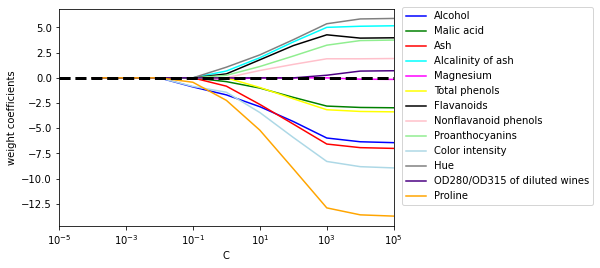

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 'pink', 
          'lightgreen', 'lightblue', 'gray', 
          'indigo', 'orange']

weights, params = [], []
for C in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.**C, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**C)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', ls='--', lw=3)
plt.xlim([10.**(-5), 10.**5])
plt.xlabel('C')
plt.ylabel('weight coefficients')
plt.xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1.03), ncol=1, fancybox=True)
plt.show()

### 순차 특성 선택 알고리즘(Sequential feature selection)

$~$

모델 복잡도를 줄이고 과대적합을 피하는 방법의 하나인 특성 선택을 통한 차원 축소(dimensionality reduction)

* 특성 선택(feature selection)
* 특성 추출(feature extraction)

#### 순차 후진 선택(Sequential Backward Selection, SBS)

1. 알고리즘을 $k=d$로 초기화 합니다. $d$는 전체 특성 공간 $X_d$의 차원입니다
2. 조건 $\mathbf{x}^-=\mathrm{argmax} \,J(\mathbf{X}_k -\mathbf{x})$를 최대화하는 특성 $\mathbf{x}^-$를 결정합니다. 여기서 $\mathbf{x}\in\mathbf{X}_k$
3. 특성집합에서 $\mathbf{x}^-$를 제거합니다. 즉 $\mathbf{X}_{k-1}=\mathbf{X}_k -\mathbf{x}^- ; \;k=k-1$
4. $k$가 목표하는 특성 개수가 되면 종료합니다. 아니면 2단계로 돌아갑니다

In [84]:
from itertools import combinations
import numpy as np
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
class SBS():
    def __init__(self, estimator, k_features, 
                 scoring=accuracy_score, 
                 test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features                # 목표 특성 개수  
        self.scoring = scoring                      # 특성의 부분 집합에 대한 모델 성능 평가   
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
           train_test_split(X, y, test_size=self.test_size, 
                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ =[score]
        
        while dim > self.k_features:
            subsets = []
            scores = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                subsets.append(p)
                scores.append(score)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best])
            dim -= 1
            
        return self
    
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        
        return score    
            

In [86]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

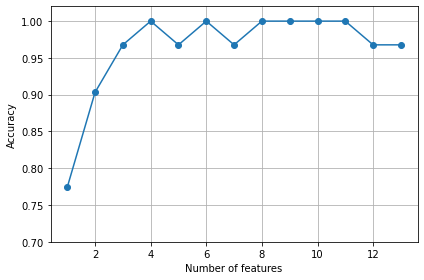

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.grid()
plt.tight_layout()
plt.show()

In [88]:
knn.fit(X_train_std, y_train)

print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.9596774193548387
테스트 정확도: 0.9259259259259259


In [89]:
k4 = list(sbs.subsets_[9])

print(df_wine.columns[1:][k4])

Index(['Alcohol', 'Magnesium', 'Total phenols', 'Color intensity'], dtype='object')


In [90]:
knn.fit(X_train_std[:, k4], y_train)

print('훈련 정확도:', knn.score(X_train_std[:, k4], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k4], y_test))

훈련 정확도: 0.9435483870967742
테스트 정확도: 0.8888888888888888


---

In [91]:
from sklearn.feature_selection import SequentialFeatureSelector  # scikit-learn 0.24 버전 이상 필요

In [92]:
scores = []
for n_features in range(1, 13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features, n_jobs=2)
    sfs.fit(X_train_std, y_train)
    f_mask = sfs.support_
    knn.fit(X_train_std[:, f_mask], y_train)
    scores.append(knn.score(X_train_std[:, f_mask], y_train))

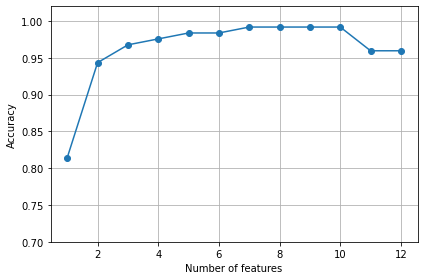

In [93]:
plt.plot(range(1, 13), scores, marker='o')
plt.ylim([0.7, 1.02])
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.grid()
plt.tight_layout()
plt.show()

In [94]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, n_jobs=2)
sfs.fit(X_train_std, y_train)

print(sfs.n_features_to_select_)

7


In [95]:
f_mask = sfs.support_
df_wine.columns[1:][f_mask]

Index(['Alcohol', 'Ash', 'Alcalinity of ash', 'Flavanoids',
       'Nonflavanoid phenols', 'Hue', 'Proline'],
      dtype='object')

In [96]:
knn.fit(X_train_std[:, f_mask], y_train)

print('훈련 정확도:', knn.score(X_train_std[:, f_mask], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, f_mask], y_test))

훈련 정확도: 0.9919354838709677
테스트 정확도: 0.9629629629629629


## 4.6 랜덤 포레스트의 특성 중요도 사용 

In [97]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [98]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


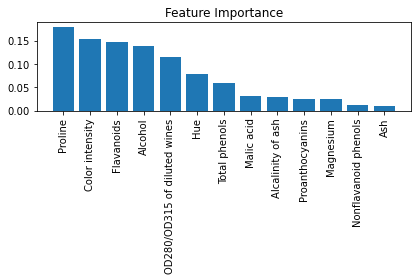

In [99]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

---

In [100]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

X_selected =sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 5


In [101]:
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818


---

In [102]:
from sklearn.feature_selection import RFE

rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
    n_features_to_select=5)

In [103]:
rfe.ranking_

array([1, 5, 9, 4, 6, 3, 1, 8, 7, 1, 2, 1, 1])

In [104]:
f_mask = rfe.support_
f_mask

array([ True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True])

In [105]:
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(len(indices)):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[f_mask][indices[f]], importances[indices[f]]))

 1) Proline                        0.246011
 2) Color intensity                0.223077
 3) Flavanoids                     0.216206
 4) OD280/OD315 of diluted wines   0.167849
 5) Alcohol                        0.146857
